# Convergence plot. Minimal BMN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.rc("text", usetex=True)
plt.style.use("../figures/paper.mplstyle")

## Read data from disk

In [30]:
# parameters
opt_label = ["COBYLA","L-BFGS-B","SLSQP","NELDER-MEAD"]
var_label = 'ry'
coupling = '02'
depth = '3'
nrep = '10'
maxiter = '10000'

In [31]:
def read_data(optimizer):
    filename = f"../data/miniBMN_l{coupling}_convergence_{optimizer}_{var_label}_depth{depth}_reps{nrep}_max{maxiter}.h5"
    return pd.read_hdf(filename,"vqe")

In [32]:
df = read_data(opt_label[0])

In [33]:
df.head()

,counts,energy
rep,,
0,1,3.565884
0,2,4.808009
0,3,4.211399
0,4,3.881846
0,5,3.836754


In [6]:
best_values = df["energy"].groupby("rep").apply(min)

In [7]:
best_values.sort_values()

rep
5    0.125046
0    0.125059
7    0.125154
3    0.125154
2    0.125155
8    0.125155
9    0.125155
4    0.149428
6    0.150001
1    0.150003
Name: energy, dtype: float64

Collect multiple data in one frame

In [34]:
frames = [read_data(o) for o in opt_label]
result = pd.concat(frames, keys=opt_label,names=['Optimizer'])

In [35]:
result.head()

counts    energy
Optimizer rep                  
COBYLA    0         1  3.565884
          0         2  4.808009
          0         3  4.211399
          0         4  3.881846
          0         5  3.836754

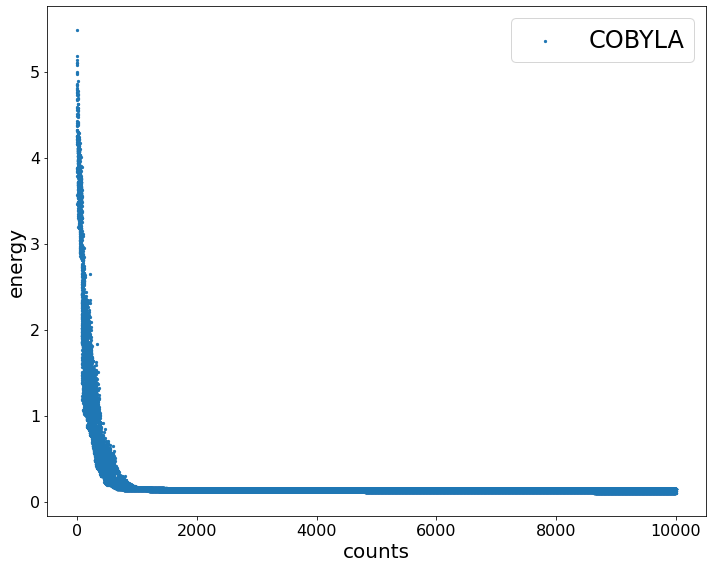

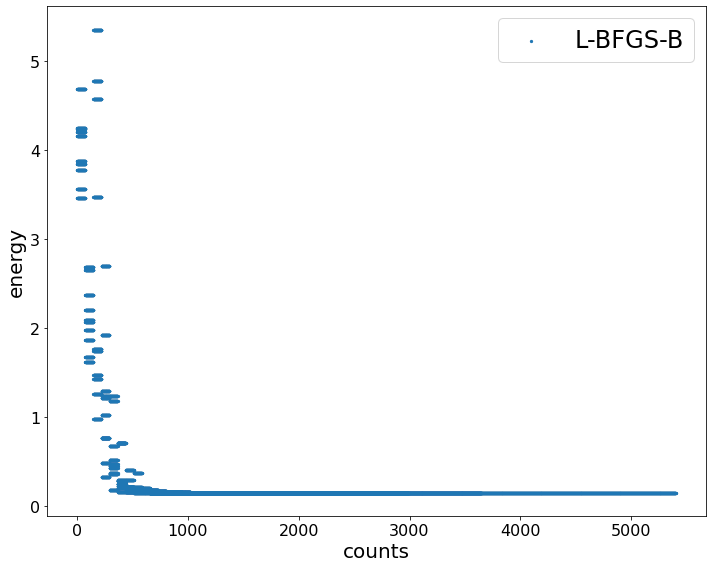

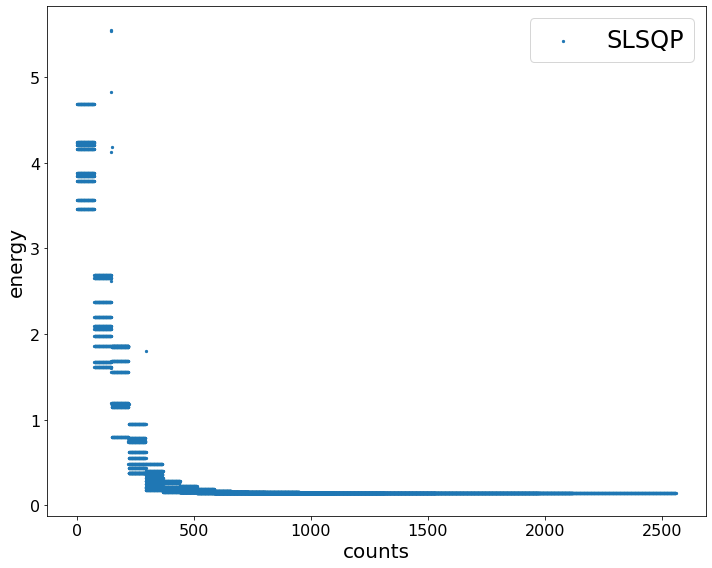

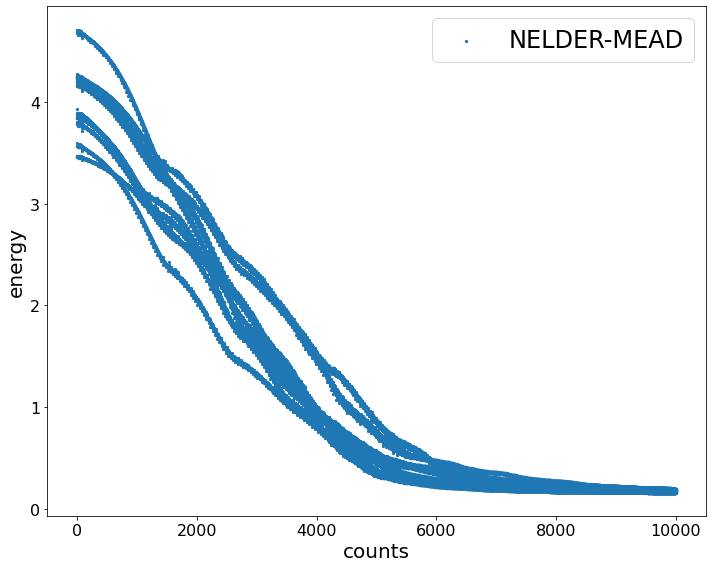

In [36]:
for o in opt_label:
    result.loc[o].plot.scatter(x='counts',y='energy',marker=".",label=o)

## Get stats

In [37]:
result.groupby('Optimizer').apply(min).energy

Optimizer
COBYLA         0.103518
L-BFGS-B       0.150000
SLSQP          0.150000
NELDER-MEAD    0.158079
Name: energy, dtype: float64

In [38]:
result.loc["COBYLA"].groupby('rep').apply(min).energy

rep
0    0.150000
1    0.150000
2    0.103518
3    0.125041
4    0.150039
5    0.150028
6    0.150011
7    0.150021
8    0.150000
9    0.150001
Name: energy, dtype: float64

In [39]:
for r in opt_label:
    print("Optimizer:",r)
    print("Mean: ",result.loc[r].groupby('rep').apply(min).energy.mean())
    print("Std: ",result.loc[r].groupby('rep').apply(min).energy.std())
    print("Min: ",result.loc[r].groupby('rep').apply(min).energy.min())
    print("Max: ",result.loc[r].groupby('rep').apply(min).energy.max())

Optimizer: COBYLA
Mean:  0.1428658510031972
Std:  0.015897573267420324
Min:  0.10351767672268163
Max:  0.1500390135796044
Optimizer: L-BFGS-B
Mean:  0.1500000041161519
Std:  1.229675668804763e-08
Min:  0.15000000001474617
Max:  0.15000003910304124
Optimizer: SLSQP
Mean:  0.15000058887466305
Std:  6.054313843273407e-07
Min:  0.15000012589340295
Max:  0.1500017432120342
Optimizer: NELDER-MEAD
Mean:  0.17774625358440488
Std:  0.013692237370407326
Min:  0.15807874015134252
Max:  0.1963147829424413


In [40]:
gs = dict()
for r in opt_label:
    gs[r] = result.loc[r].groupby('rep').apply(min).energy
gsdf = pd.DataFrame.from_dict(gs, dtype=float)

In [41]:
gsdf

,COBYLA,L-BFGS-B,SLSQP,NELDER-MEAD
rep,,,,
0,0.150000,0.15,0.150002,0.167716
1,0.150000,0.15,0.150000,0.195052
2,0.103518,0.15,0.150000,0.158079
3,0.125041,0.15,0.150001,0.160812
4,0.150039,0.15,0.150000,0.178088
5,0.150028,0.15,0.150000,0.192677
6,0.150011,0.15,0.150001,0.196315
7,0.150021,0.15,0.150002,0.171184
8,0.150000,0.15,0.150000,0.178210


In [42]:
gsdf.describe().T[["min","max","mean","std"]]

,min,max,mean,std
COBYLA,0.103518,0.150039,0.142866,1.589757e-02
L-BFGS-B,0.150000,0.150000,0.150000,1.229676e-08
SLSQP,0.150000,0.150002,0.150001,6.054314e-07
NELDER-MEAD,0.158079,0.196315,0.177746,1.369224e-02


## Plot convergence

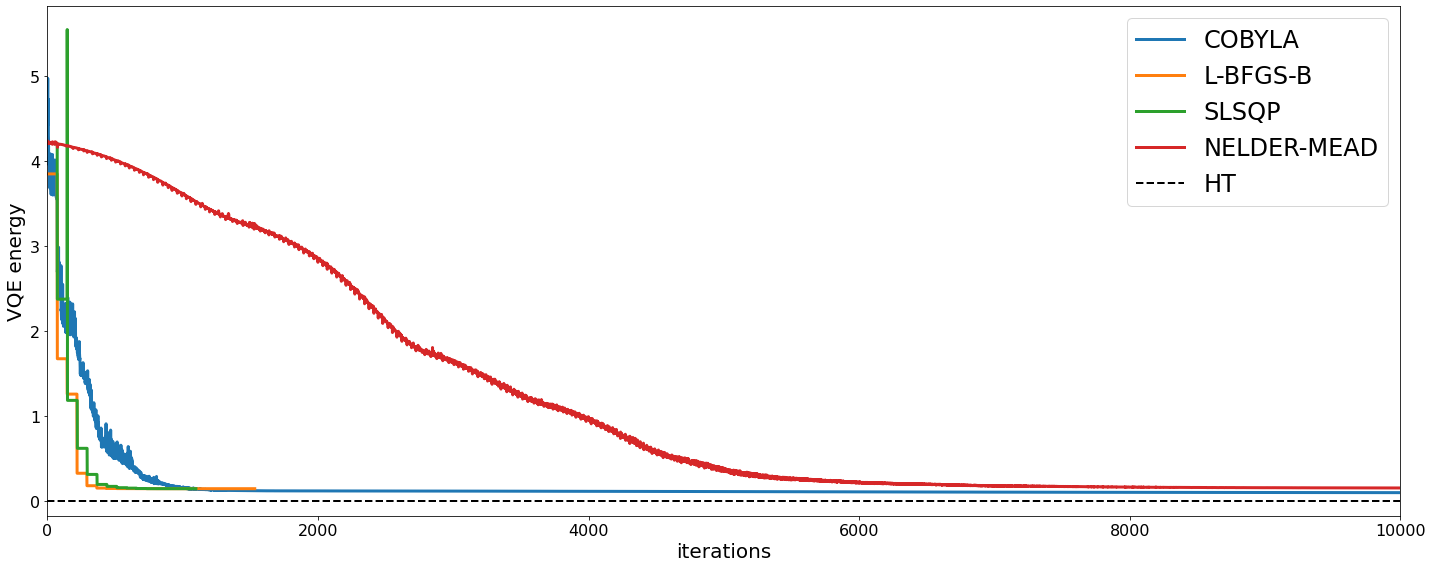

In [43]:
# select the best runs for each optimizer
fig, ax = plt.subplots(figsize=(20,8))
for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,10000],label=o, ax=ax)
ax.axhline(0.00328726,c="k",ls="--", lw="2",label="HT")
ax.set_xlabel("iterations")
ax.set_ylabel("VQE energy")
ax.legend(loc="upper right")
plt.savefig(f"../figures/miniBMN_l02_convergence_ry_depth3_max10000.pdf")
plt.savefig(f"../figures/miniBMN_l02_convergence_ry_depth3_max10000.png")

Zoom in

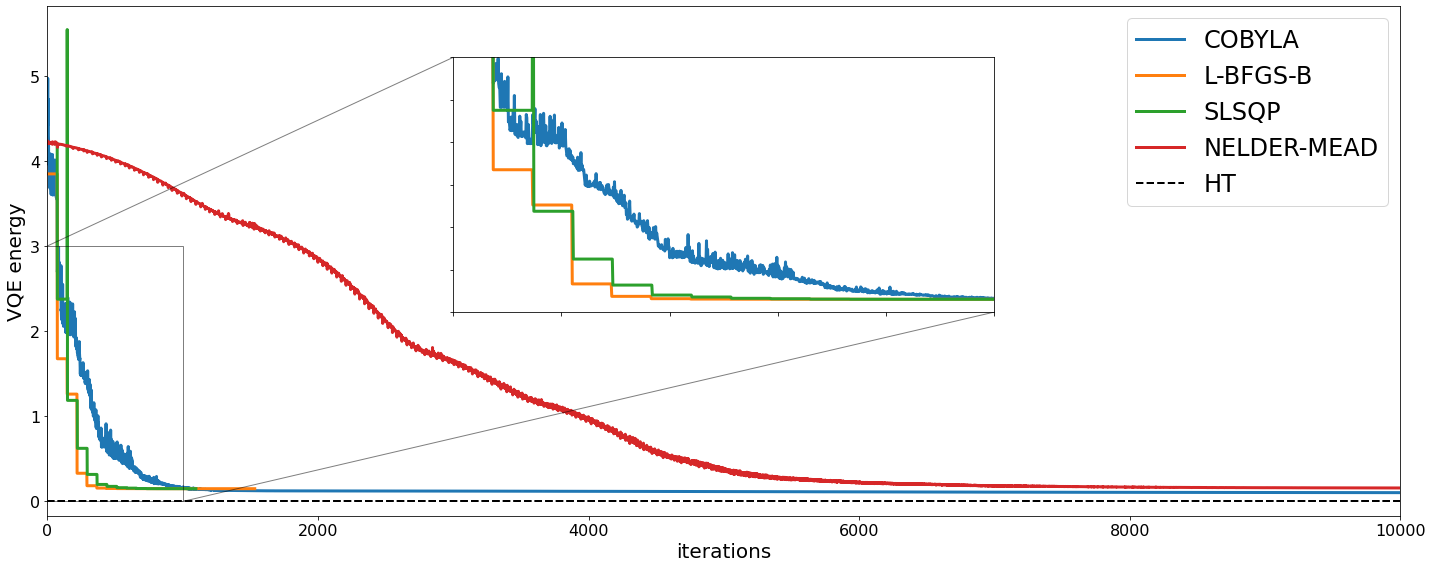

In [47]:
# select the best runs for each optimizer
fig, ax = plt.subplots(figsize=(20,8))
for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,10000],label=o, ax=ax)
ax.axhline(0.00328726,c="k",ls="--", lw="2",label="HT")

# inset axes.... bounds are [x0, y0, width, height] for where to put it
axins = ax.inset_axes([0.3, 0.4, 0.3, 0.5])

for o in opt_label:
    result.loc[o,gsdf[o].idxmin()].plot(x='counts',y='energy', xlim=[0,500], legend=False, ax=axins)
ax.axhline(0.00328726,c="k",ls="--", lw="2")
# sub region of the original image
x1, x2, y1, y2 = 0, 500, 0, 3
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')
axins.set_ylabel('')
axins.set_xlabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

ax.set_xlabel("iterations")
ax.set_ylabel("VQE energy")
ax.legend(loc="upper right")
plt.savefig(f"../figures/miniBMN_l02_convergence_ry_depth3_max10000_zoom.pdf")
plt.savefig(f"../figures/miniBMN_l02_convergence_ry_depth3_max10000_zoom.png")